# Downloading and Prepping Data <a id="2"></a>

Import primary modules.

In [636]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import matplotlib.pyplot as plt

Download the dataset and read it into a *pandas* dataframe.

In [637]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Clean up data. We will make some modifications to the original dataset to make it easier to create our visualizations. Refer to *Introduction to Matplotlib and Line Plots* and *Area Plots, Histograms, and Bar Plots* for a detailed description of this preprocessing.

In [638]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


**Question 1:** Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

**Note**: You might need to play with the explore values in order to fix any overlapping slice values.

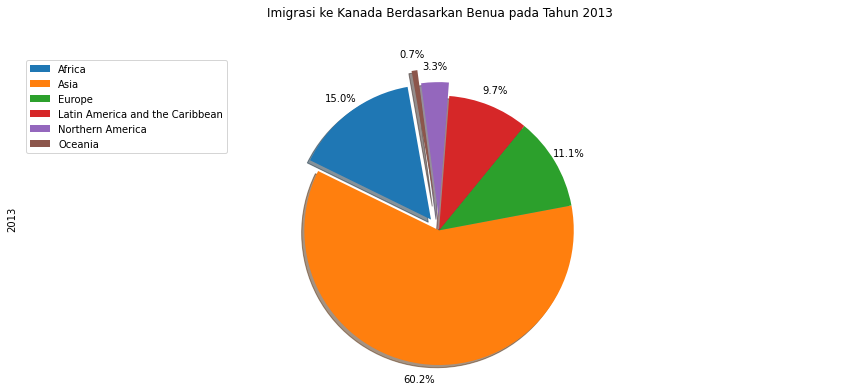

In [639]:
### type your answer here
df_continents = df_can.groupby('Continent', axis=0).sum()
explode_list = [0.1, 0, 0, 0, 0.1, 0.2]

df_continents['2013'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=100,    
                            shadow=True,       
                            labels=None,                 
                            pctdistance=1.12,           
                            explode=explode_list         
                            )

plt.title('Imigrasi ke Kanada Berdasarkan Benua pada Tahun 2013', y = 1.1) 
plt.axis('equal') 

plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()




**Question 2:** Compare the distribution of the number of immigrants from Pakistan and Afghanistan from 1980 to 2013.

Step 1: Get the dataset for Pakistan and Afghanistan and call the dataframe **df_PA**.

In [640]:
### type your answer here
df_PA = df_can.loc[['Pakistan','Afghanistan'], years].transpose()
df_PA.head()

Country,Pakistan,Afghanistan
1980,978,16
1981,972,39
1982,1201,39
1983,900,47
1984,668,71


Step 2: Plot data.

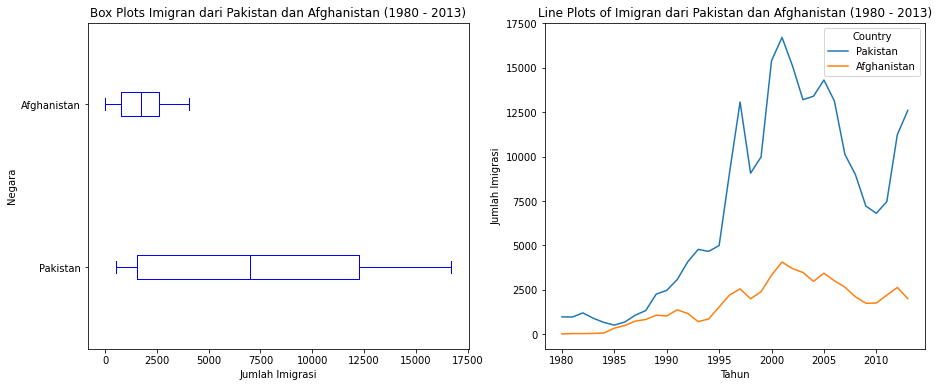

In [641]:
### type your answer here

fig = plt.figure()

ax0 = fig.add_subplot(1 ,2 ,1)
ax1 = fig.add_subplot(1, 2, 2)

# Subplot 1: Box plot
df_PA.plot(kind='box', color='blue', vert=False, figsize=(15, 6), ax=ax0)
ax0.set_title('Box Plots Imigran dari Pakistan dan Afghanistan (1980 - 2013)')
ax0.set_xlabel('Jumlah Imigrasi')
ax0.set_ylabel('Negara')

# Subplot 2: Line plot
df_PA.plot(kind='line', figsize=(15, 6), ax=ax1)
ax1.set_title ('Line Plots of Imigran dari Pakistan dan Afghanistan (1980 - 2013)')
ax1.set_ylabel('Jumlah Imigrasi')
ax1.set_xlabel('Tahun')

plt.show()

**Question 3**: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

Step 1: Get the data:
   1. Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it **df_countries**.
   2. Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe **df_total**.
   3. Reset the index in place.
   4. Rename the columns to **year** and **total**.
   5. Display the resulting dataframe.

In [642]:
### type your answer here

#1
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'],years].transpose()

#2
df_total = pd.DataFrame(df_countries.sum(axis=1))

#3
df_total.reset_index(inplace=True)

#4
df_total.columns = ['year', 'total']
df_total['year'] = df_total['year'].astype(int)

#5
df_total.head()




,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


Step 2: Generate the scatter plot by plotting the total versus year in **df_total**.

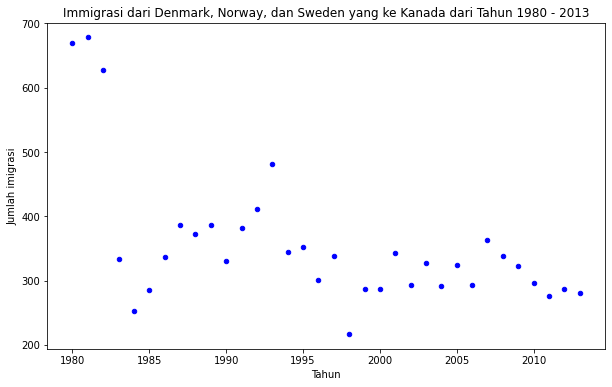

In [643]:
### type your answer here

df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='blue')

plt.title('Immigrasi dari Denmark, Norway, dan Sweden yang ke Kanada dari Tahun 1980 - 2013')
plt.xlabel('Tahun')
plt.ylabel('Jumlah imigrasi')

plt.show()

**Question 4**: Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use **df_can_t** that we defined and used in the previous example.

Step 1: Normalize the data pertaining to China and India.

In [644]:
### type your answer here

df_can_t = df_can[years].transpose()
df_can_t.index = map(int, df_can_t.index)
df_can_t.index.name = 'Year'
df_can_t.reset_index(inplace=True)

 # normalisasi data china
normalisasi_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())

# normalisasi data india
normalisasi_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

Step 2: Generate the bubble plots.

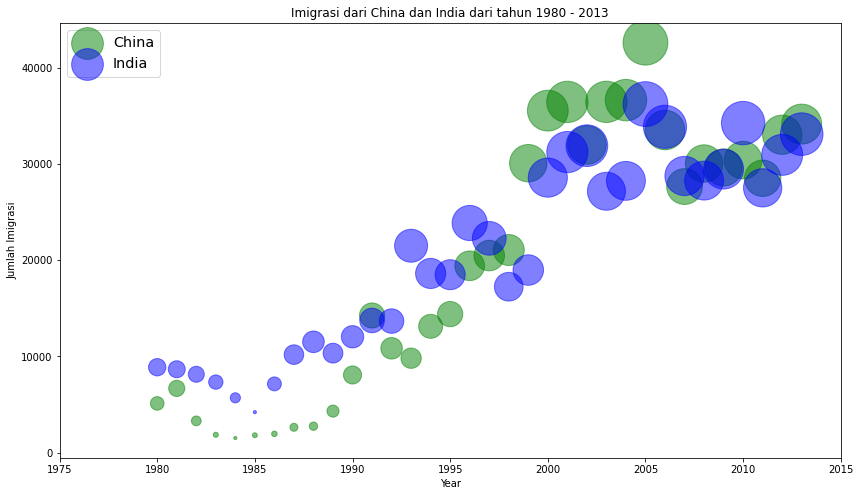

In [645]:
### type your answer here

# China
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,                
                    color='green',
                    s=normalisasi_china * 2000 + 10,
                    xlim=(1975, 2015)
                   )

# India
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="blue",
                    s=normalisasi_india * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Jumlah Imigrasi')
ax0.set_title('Imigrasi dari China dan India dari tahun 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')



# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).